## 			Project: Predicting Car Prices
### 			Practice the machine learning workflow using k-nearest neighbors to predict car prices.

#### 	1	.	Introduction to the data set

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. We can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

Database DOcumentation can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile)

Lets import the data file after downloading.



In [2]:
import pandas as pd
import numpy as np

cars = pd.read_csv('imports-85.data')

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    int64  
 1   ?            204 non-null    object 
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          204 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.60        204 non-null    float64
 10  168.80       204 non-null    float64
 11  64.10        204 non-null    float64
 12  48.80        204 non-null    float64
 13  2548         204 non-null    int64  
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         204 non-null    object 
 19  2.68    

After looking at the data file, the columns names need to be specified while reading the data.
Going through the database documentation, below are the columns.

1. `	 symboling	` :	 -3, -2, -1, 0, 1, 2, 3.
2. `	 normalized-losses	` :	 continuous from 65 to 256.
3. `	 make	` :	alfa-romero, audi, bmw, chevrolet, dodge, honda,
4. `	 fuel-type	` :	 diesel, gas.
5. `	 aspiration	` :	 std, turbo.
6. `	 num-of-doors	` :	 four, two.
7. `	 body-style	` :	 hardtop, wagon, sedan, hatchback, convertible.
8. `	 drive-wheels	` :	 4wd, fwd, rwd.
9. `	 engine-location	` :	 front, rear.
10. `	 wheel-base	` :	 continuous from 86.6 120.9.
11. `	 length	` :	 continuous from 141.1 to 208.1.
12. `	 width	` :	 continuous from 60.3 to 72.3.
13. `	 height	` :	 continuous from 47.8 to 59.8.
14. `	 curb-weight	` :	 continuous from 1488 to 4066.
15. `	 engine-type	` :	 dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. `	 num-of-cylinders	` :	 eight, five, four, six, three, twelve, two.
17. `	 engine-size	` :	 continuous from 61 to 326.
18. `	 fuel-system	` :	 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. `	 bore	` :	 continuous from 2.54 to 3.94.
20. `	 stroke	` :	 continuous from 2.07 to 4.17.
21. `	 compression-ratio	` :	 continuous from 7 to 23.
22. `	 horsepower	` :	 continuous from 48 to 288.
23. `	 peak-rpm	` :	 continuous from 4150 to 6600.
24. `	 city-mpg	` :	 continuous from 13 to 49.
25. `	 highway-mpg	` :	 continuous from 16 to 54.
26. `	 price	` :	 continuous from 5118 to 45400.

In [3]:
column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

cars = pd.read_csv('imports-85.data', names=column_names)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Selectng the continuous columns


In [5]:
continuous_cols = ["normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

numeric_cars = cars[continuous_cols]

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-ratio  205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


#### 	2	.	Data Cleaning

We can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the `normalized-losses` column contains missing values represented using `"?"`

Let's replace these values and look for the presence of missing values in other numeric columns. Let's also [rescale](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling) the values in the numeric columns so they all range from `0` to `1`.

In [7]:
numeric_cars = numeric_cars.replace("?", np.nan)

In [8]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


Because `?` is a string value, columns containing this value were cast to the pandas `object` data type (instead of a numeric type like `int` or `float`). After replacing the `?` values, determine which columns need to be converted to numeric types.

In [9]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-ratio  205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [10]:
numeric_cars = numeric_cars.astype('float')


In [11]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

The number of rows that have a missing value for the `normalized-losses` column.

In [12]:
numeric_cars['normalized-losses'].isnull().sum()

41

    Our target column is `price` column. So we will be dropping the rows which don't have the price column values.

In [13]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [14]:
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [15]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [16]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [17]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

We normalize the numeric ones so all values range from 0 to 1 except the target column.

In [18]:
price_col = numeric_cars['price']

numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())

numeric_cars['price'] = price_col

In [19]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


#### 	3	.	Univariate Model

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [21]:
def knn_train_test(training_col, target_col, df):
    np.random.seed(1)
#     print("inside function", training_col, target_col, df.head())
    # Shuffling the index
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Splitting the dataset into train and test data, both having same number of rows
    to_split = int(len(df) / 2)
    train_set = df.iloc[:to_split]
    test_set = df.iloc[to_split:]
    
    # Instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor()
    knn.fit(train_set[training_col], train_set[target_col])
    predictions = knn.predict(test_set[training_col])
    
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = np.sqrt(mse)
#     print(rmse)
    
    return rmse
        

In [22]:
numeric_cols = continuous_cols.copy()
numeric_cols.remove('price')
# print(numeric_cols)

rmses = dict()

for col in numeric_cols:
    rmses[col] = knn_train_test([col], 'price', numeric_cars)
    
# print(rmses)

best_col = min(rmses, key=rmses.get)

rmse_series = pd.Series(rmses)
print(rmse_series.sort_values())

print("\nBest column which performed the best is - ", best_col,":", rmses[best_col])

engine-size           4190.433888
horsepower            4267.730361
highway-mpg           4628.793094
city-mpg              4814.778015
curb-weight           5166.828581
width                 7110.412630
compression-ratio     8096.301512
normalized-losses     8131.436882
length                8304.189346
stroke                9334.714914
peak-rpm              9759.209970
wheel-base            9969.243292
height               10839.693636
bore                 13397.091693
dtype: float64

Best column which performed the best is -  engine-size : 4190.43388788236


In [23]:
def knn_train_test(k, training_col, target_col, df):
    np.random.seed(1)
#     print("inside function", training_col, target_col, df.head())
    # Shuffling the index
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Splitting the dataset into train and test data, both having same number of rows
    to_split = int(len(df) / 2)
    train_set = df.iloc[:to_split]
    test_set = df.iloc[to_split:]
    
    # Instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[training_col], train_set[target_col])
    predictions = knn.predict(test_set[training_col])
    
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse
        

In [24]:
k_val = [1, 3, 5, 7, 9]
k_rmses = {}

for col in numeric_cols:
    k_rmses[col] = {}
    for k in k_val:
        k_rmses[col][k] = knn_train_test(k, [col], 'price', numeric_cars)
    

k_rmses

{'normalized-losses': {1: 11628.904782718988,
  3: 9578.793245190305,
  5: 8131.436882072488,
  7: 7441.814253467208,
  9: 7644.0837748147915},
 'wheel-base': {1: 8052.050206913359,
  3: 9171.153878561105,
  5: 9969.243291700175,
  7: 8938.808809133783,
  9: 8637.3043859821},
 'length': {1: 10053.579063701594,
  3: 8230.050248540974,
  5: 8304.189346264562,
  7: 8483.928913734228,
  9: 7655.12304417215},
 'width': {1: 8044.1444455819,
  3: 7234.558219432825,
  5: 7110.412630045104,
  7: 6621.848358316696,
  9: 6531.417638109127},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.330965281266},
 'curb-weight': {1: 6566.749175404316,
  3: 5635.184748392448,
  5: 5166.828580646175,
  7: 5239.631250704795,
  9: 5244.5555635847895},
 'engine-size': {1: 5338.7918201602415,
  3: 4698.501673022703,
  5: 4190.43388788236,
  7: 4114.571307788718,
  9: 4056.629359658438},
 'bore': {1: 16502.858944335483,
  3: 13895.11178798717,

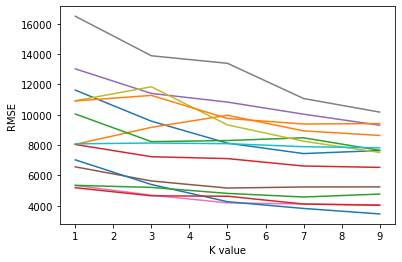

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in k_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('K value')
    plt.ylabel('RMSE')

#### 	4	.	Multivariate Model

Modify the `knn_train_test()` function we wrote in the last step to work with multiple columns.

In [32]:
def knn_train_test(training_col, target_col, df):
    np.random.seed(1)
#     print("inside function", training_col, target_col, df.head())
    # Shuffling the index
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Splitting the dataset into train and test data, both having same number of rows
    to_split = int(len(df) / 2)
    train_set = df.iloc[:to_split]
    test_set = df.iloc[to_split:]
    
    # Instantiate the KNeighborsRegressor class
    kval = [1, 3, 5 , 7, 9]
    k_rmses = {}
    
    for k in k_val:
        #Fit the model using k nearest neighbours
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[training_col], train_set[target_col])
        predictions = knn.predict(test_set[training_col])

        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k]= rmse
    
    return k_rmses

In [35]:
all_feature_rmse = knn_train_test(numeric_cols, 'price', numeric_cars)

all_feature_rmse

5100.039644691573

Compute average RMSE accross different 'k' value for each feature.


In [39]:
feature_avg_rmse = {}
for k,v in k_rmses.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

    series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()

print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size           4479.785610
highway-mpg           4522.911624
horsepower            4795.755143
city-mpg              4943.696718
curb-weight           5570.589864
width                 7108.476258
compression-ratio     8007.936956
length                8545.374123
normalized-losses     8885.006588
wheel-base            8953.712114
stroke                9576.240416
peak-rpm             10154.303501
height               10927.529704
bore                 13009.824975
dtype: float64


Getting the best features

In [44]:
def knn_train_test(training_col, target_col, df):
    np.random.seed(1)
#     print("inside function", training_col, target_col, df.head())
    # Shuffling the index
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Splitting the dataset into train and test data, both having same number of rows
    to_split = int(len(df) / 2)
    train_set = df.iloc[:to_split]
    test_set = df.iloc[to_split:]
    
    # Instantiate the KNeighborsRegressor class
    k_val = [5]
    k_rmses_default = {}
    
    for k in k_val:
        #Fit the model using k nearest neighbours
        knn = KNeighborsRegressor(n_neighbors=k)
        
        knn.fit(train_set[training_col], train_set[target_col])
        predictions = knn.predict(test_set[training_col])

        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses_default[k]= rmse
    
    return k_rmses_default

k_best_rmse_results = {}

for feature in range(2, 7):
    k_best_rmse_results['{} best features'.format(feature)] = knn_train_test(sorted_features[:feature], 'price', numeric_cars)
    

k_best_rmse_results

{'2 best features': {5: 4350.739368552121},
 '3 best features': {5: 3553.981440358945},
 '4 best features': {5: 3543.6021088353828},
 '5 best features': {5: 3874.8264102159374},
 '6 best features': {5: 4425.238850587895}}

Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter

#### 	5	.	Hyperparameter Tuning

For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [48]:
def knn_train_test(training_col, target_col, df):
    np.random.seed(1)
#     print("inside function", training_col, target_col, df.head())
    # Shuffling the index
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Splitting the dataset into train and test data, both having same number of rows
    to_split = int(len(df) / 2)
    train_set = df.iloc[:to_split]
    test_set = df.iloc[to_split:]
    
    # Instantiate the KNeighborsRegressor class
    k_val = list(range(1, 25))
    k_rmses = {}
    
    for k in k_val:
        #Fit the model using k nearest neighbours
        knn = KNeighborsRegressor(n_neighbors=k)
        
        knn.fit(train_set[training_col], train_set[target_col])
        predictions = knn.predict(test_set[training_col])

        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k]= rmse
    
    return k_rmses

k_best_rmse_results = {}

for feature in range(2, 6):
    k_best_rmse_results['{} best features'.format(feature)] = knn_train_test(sorted_features[:feature], 'price', numeric_cars)
    

k_best_rmse_results

{'2 best features': {1: 4354.642008225474,
  2: 4526.921679910048,
  3: 4498.43322914231,
  4: 4248.608371680761,
  5: 4350.739368552121,
  6: 4130.239857605504,
  7: 3654.7705512907833,
  8: 3406.299556274992,
  9: 3291.4253938953298,
  10: 3266.6972227539723,
  11: 3224.49796035129,
  12: 3066.8474225454743,
  13: 3107.0036162955766,
  14: 3188.063991712777,
  15: 3276.4526932206863,
  16: 3400.6384513355333,
  17: 3408.1445816852847,
  18: 3414.0628526759374,
  19: 3456.89519227418,
  20: 3492.0426405636645,
  21: 3534.9541209326044,
  22: 3558.967168879261,
  23: 3558.0960929779826,
  24: 3456.6927863991823},
 '3 best features': {1: 3573.428345246881,
  2: 3918.785387510566,
  3: 4012.2889992124597,
  4: 3613.015900672851,
  5: 3553.981440358945,
  6: 3451.4337330349185,
  7: 3387.6562998182267,
  8: 3175.405256889689,
  9: 3077.2931249951084,
  10: 3205.004979499074,
  11: 3335.759981381083,
  12: 3501.7441190855247,
  13: 3644.6561170504287,
  14: 3627.423710815073,
  15: 3576.92

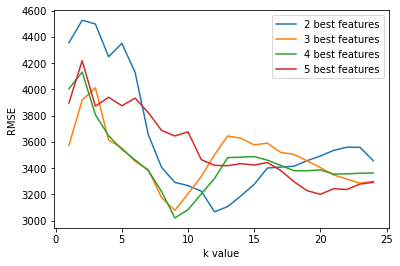

In [51]:
for k, v in k_best_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label=f"{k}")
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

[How to find the optimal value of K in KNN?](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb)